 Concept panel for figure 2.

In [1]:
import sys
sys.path.append('../')
from low_rank_rnns import rdm, helpers
from low_rank_rnns.modules import *
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
helpers.setup_matplotlib()

In [3]:
hidden_size = 512
noise_std = 5e-2
alpha = 0.2
x_train, y_train, mask_train, x_val, y_val, mask_val = rdm.generate_rdm_data(1000)
net = LowRankRNN(1, hidden_size, 1, noise_std, alpha, rank=1)
net.load_state_dict(torch.load(f'../models/rdm_lr_fig2.pt', map_location='cpu'))
loss, acc = rdm.test_rdm(net, x_val, y_val, mask_val)
print(loss, acc)

0.0006864335155114532 1.0


In [4]:
m = net.m[:,0].detach().numpy()
n = net.n[:,0].detach().numpy()
wi = net.wi_full[0].detach().numpy()
wo = net.wo_full[:,0].detach().numpy()

m = -m
n = -n

vecs = np.array([wi, n, m, wo]).T

[[ True False False False]
 [ True  True False False]
 [ True  True  True False]
 [ True  True  True  True]]
[[ 0.          0.90636241  0.49015319 -0.06277603]
 [ 0.          0.          1.3232739   0.72842503]
 [ 0.          0.          0.          2.44673157]
 [ 0.          0.          0.          0.        ]]


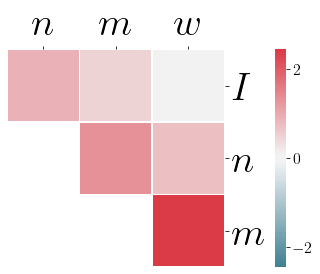

In [5]:
lsize = 40
plt.rcParams['text.usetex'] = True
vectors = [wi, n, m, wo]
labels = ['$I$', '$n$', '$m$ ', '$w$']
ov = helpers.overlap_matrix(vectors)
fig, ax = plt.subplots()
helpers.get_lower_tri_heatmap(ov, cbar=True, cbar_shrink=1, cbar_pad=.15, ax=ax)
ax.set_xticks([.5, 1.5, 2.5])
ax.set_xticklabels(labels[1:])
ax.set_yticklabels(labels[:-1])
ax.xaxis.set_tick_params(labelsize=lsize)
ax.yaxis.set_tick_params(rotation=0, labelsize=lsize)
# plt.savefig('figure_2/concepts_overlap.eps', bbox_inches='tight')

In [6]:
bound = np.max((np.abs(np.min(ov)), np.abs(np.max(ov))))
bounds = [-bound, bound]
cmap = sns.diverging_palette(220, 10, sep=10, as_cmap=True)

0.5002435987604943 0.06626702477214615 0.39812849615829043
0.23623837453851054 0.04742416520375646 0.2013048970756461
-0.0015452572774138972 0.03609943601786317 -0.005490898782303701
0.6342322426454476 -0.030101041672322693 0.6790636560541864
0.019810079584572336 -0.05600735468313351 0.08844782084930647
0.06733872584707272 -0.03406956559854912 0.2808042269516107


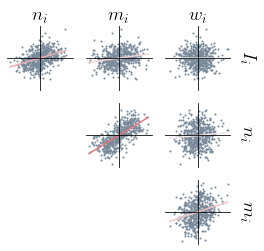

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(4, 4))

for i in range(3):
    for j in range(3):
        if j < i:
            axes[i][j].set_axis_off()
        else:
            ax = axes[i][j]
            ax.scatter(vecs[:, j + 1], vecs[:, i], s=1, c= 'lightslategray')
            # ax.scatter(vecs[4, j + 1], vecs[4, i], s=5, c='red')
            res = linregress(vecs[:, j + 1], vecs[:, i])
            print(res.slope, res.intercept, res.rvalue)
            helpers.center_axes(ax)
            helpers.center_limits(ax)
            xmin, xmax = np.min(vecs[:, j + 1]), np.max(vecs[:, j + 1])
            ax.plot([xmin, xmax], [xmin * res.slope + res.intercept, xmax * res.slope + res.intercept], 
                     c=cmap((res.rvalue + 1) / 2))
            
axes[0, 0].set_xlabel(r'$n_i$')
axes[0, 0].xaxis.set_label_coords(.5, 1.3)
axes[0, 1].set_xlabel(r'$m_i$')
axes[0, 1].xaxis.set_label_coords(.5, 1.3)
axes[0, 2].set_xlabel(r'$w_i$')
axes[0, 2].xaxis.set_label_coords(.5, 1.3)
axes[0, 2].set_ylabel(r'$I_i$', rotation=270)
axes[0, 2].yaxis.set_label_coords(1.15, .5)
axes[1, 2].set_ylabel(r'$n_i$', rotation=270)
axes[1, 2].yaxis.set_label_coords(1.15, .5)
axes[2, 2].set_ylabel(r'$m_i$', rotation=270)
axes[2, 2].yaxis.set_label_coords(1.15, .5)
# plt.savefig('figure_2/concepts_loadings.eps', bbox_inches='tight')
plt.show()